[0, 2.0, 3.41, 4.46, 5.43, 6.22, 6.935, 7.705, 8.325, 8.98, 9.535, 10.075, 10.57, 11.055, 11.61, 12.07, 12.525, 12.95, 13.37, 13.785, 14.135, 14.44, 14.75, 15.205, 15.545, 15.92, 16.25, 16.71, 17.025, 17.36, 17.695, 18.085, 18.47, 18.82, 19.105, 19.37, 19.675, 19.96, 20.23, 20.49, 20.73, 21.045, 21.295, 21.63, 21.95, 22.19, 22.46, 22.69, 22.92, 23.15, 23.405, 23.615, 23.875, 24.125, 24.405, 24.58, 24.795, 25.015, 25.22, 25.47, 25.665, 25.905, 26.09, 26.215, 26.445, 26.66, 26.835, 27.11, 27.325, 27.51, 27.79, 27.95, 28.155, 28.385, 28.54, 28.755, 29.0, 29.16, 29.35, 29.505, 29.745, 29.97, 30.205, 30.42, 30.585, 30.78, 30.97, 31.1, 31.375, 31.58, 31.72, 31.88, 32.085, 32.265, 32.46, 32.565, 32.76, 32.945, 33.03, 33.22, 33.42, 33.595, 33.72, 33.93, 34.08, 34.24, 34.405, 34.595, 34.785, 34.965, 35.135, 35.325, 35.46, 35.665, 35.88, 35.97, 36.14, 36.255, 36.375, 36.53, 36.69, 36.84, 37.055, 37.24, 37.425, 37.6, 37.72, 37.86, 38.065, 38.24, 38.36, 38.6, 38.79, 38.935, 39.095, 39.305, 39.41, 

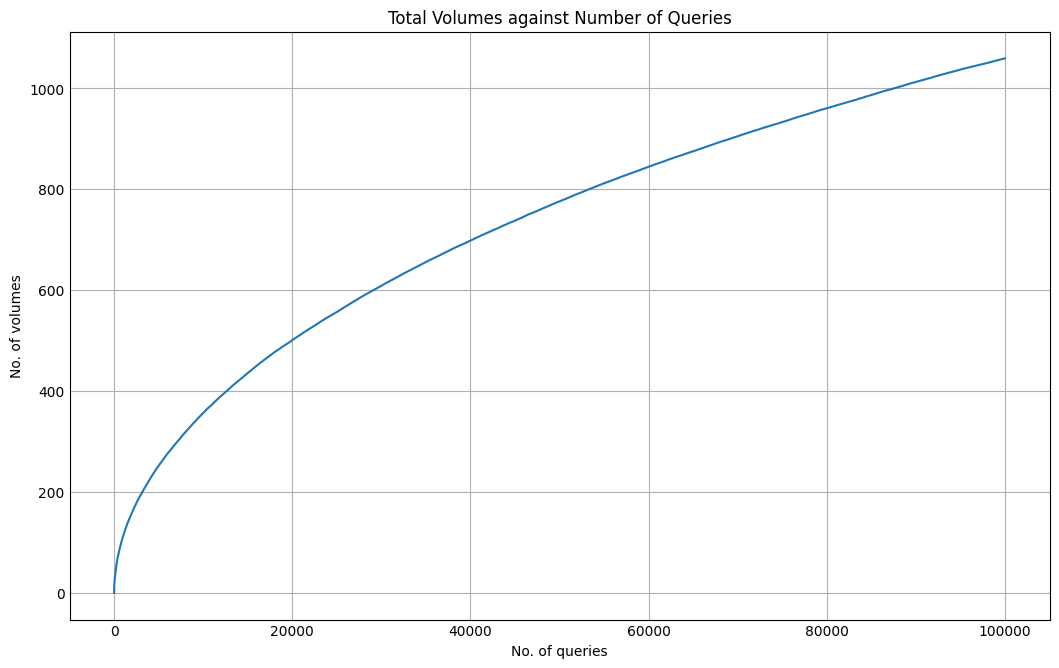

In [4]:

import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 2048

def is_power_of_two(x):
    return (x & (x - 1)) == 0

def overcover(start, end):
    diff = (end - start) - 1
    while True:
        diff += 1
        if is_power_of_two(diff + 1):  # Check if diff + 1 is a power of 2
            N = math.log(diff + 1, 2)
            break
    if start == end:
        return (start, end)
    elif start == end - 1:
        return (start, end)
    else:
        for i in range(int(N), int(math.log(RSEmax, 2)) + 1):  # Ensure N is an integer
            for j in range(0, start):
                if (start - j) % 2**(i-1) == 1:
                    if start - j + 2**i - 1 >= end:
                        return (start - j, start - j + 2**i - 1)
                    else:
                        break

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

max_volumes = 3*RSEmax - (math.log(RSEmax, 2)+2)
no_of_runs = 200
no_of_queries = 100000
def augovercover_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = set()
        vol_sum = 0
        query_tracker = set()
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) >= max_volumes:
                when_max_reach = j
                for v in range(when_max_reach, no_of_queries):
                    arr[v+1] = max_volumes + arr[v+1]
                break
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            while query_asked in query_tracker:
                query_asked = query_gen()
            else:
                query_tracker.add(query_asked)
                (a,b) = query_asked
                query_list = overcover(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.add(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    print(arr)
    return(arr)

arr = augovercover_query(no_of_runs,no_of_queries) 

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()